# An Investigation on Employee Exit Surveys

`Department of Education, Training and Employment` **(DETE)** and the `Technical and Further Education` **(TAFE)** institute in Queensland, Australia wants to know whether - 
1. Employees who only worked for the institutes for a short period of time were resigning due to some kind of dissatisfaction. Also, what about experienced, established and veteran employees, who have been there longer?
2. Younger employees were resigning due to some kind of dissatisfaction. Also, what about older employees?

Both the institutes made their own exit-surve data available to me. The datasets are available in public domain also, I have provided the link below- <br>
[`tafe_survey`](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)
[`dete_survey`](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

In this projects I have analyzed the datasets by cleaning, combining and visualizing to answer the above questions.

## Exploring datasets

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dete_survey = pd.read_csv('dete_survey.csv',encoding='cp1252')
# tafe_survey = pd.read_csv('tafe_survey.csv',encoding='cp1252')
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

### Step 1 - Display Both Datasets using `head()` (to seek out BAD DATA)
#### 1.1 Displaying Top 5 Rows of the DETE dataset

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


#### 1.2 Displaying Top 5 Rows of the TAFE dataset

In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


#### 1.3 Displaying Columns Names of the DETE dataset

In [5]:
index = 0
for colname in dete_survey.columns:
    print(index, colname)
    index +=1

0 ID
1 SeparationType
2 Cease Date
3 DETE Start Date
4 Role Start Date
5 Position
6 Classification
7 Region
8 Business Unit
9 Employment Status
10 Career move to public sector
11 Career move to private sector
12 Interpersonal conflicts
13 Job dissatisfaction
14 Dissatisfaction with the department
15 Physical work environment
16 Lack of recognition
17 Lack of job security
18 Work location
19 Employment conditions
20 Maternity/family
21 Relocation
22 Study/Travel
23 Ill Health
24 Traumatic incident
25 Work life balance
26 Workload
27 None of the above
28 Professional Development
29 Opportunities for promotion
30 Staff morale
31 Workplace issue
32 Physical environment
33 Worklife balance
34 Stress and pressure support
35 Performance of supervisor
36 Peer support
37 Initiative
38 Skills
39 Coach
40 Career Aspirations
41 Feedback
42 Further PD
43 Communication
44 My say
45 Information
46 Kept informed
47 Wellness programs
48 Health & Safety
49 Gender
50 Age
51 Aboriginal
52 Torres Strait
53

#### 1.4 Displaying Columns Names of the TAFE dataset

In [6]:
index = 0
for colname in tafe_survey.columns:
    print(index, colname)
    index +=1

0 Record ID
1 Institute
2 WorkArea
3 CESSATION YEAR
4 Reason for ceasing employment
5 Contributing Factors. Career Move - Public Sector 
6 Contributing Factors. Career Move - Private Sector 
7 Contributing Factors. Career Move - Self-employment
8 Contributing Factors. Ill Health
9 Contributing Factors. Maternity/Family
10 Contributing Factors. Dissatisfaction
11 Contributing Factors. Job Dissatisfaction
12 Contributing Factors. Interpersonal Conflict
13 Contributing Factors. Study
14 Contributing Factors. Travel
15 Contributing Factors. Other
16 Contributing Factors. NONE
17 Main Factor. Which of these was the main factor for leaving?
18 InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction
19 InstituteViews. Topic:2. I was given access to skills training to help me do my job better
20 InstituteViews. Topic:3. I was given adequate opportunities for personal development
21 InstituteViews. Topic:4. I was given adequate opportunities for promotion within %

### How "BAD" is the Raw-Data?
*Some things in life just aren't perfect.*<br>
Bad Data almost always creeps inside datasets, and the bigger the dataset, the higher the volume of bad data. Cleaning and reshaping the data, thus, becomes a crucial aspect of data analysis.<br>
The following observations can be pointed out immediately after glancing at the datasets above -
1. The `dete_survey` dataset contains '`Not Stated`' values that indicate values are missing, but they aren't represented as NaN.
2. Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
3. Each dataframe contains many of the same columns, but the column names are different.
4. There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.<br>

### Step 2 - Re-Read "`Not Stated`" values in datasets as `NaN` values
From **`1.1`**, a couple of `Not Stated` values can be observed. These values are of the `str` type, and it might be better if these values could be re-read as `NaN` or `NULL` type.


In [7]:
dete_survey = pd.read_csv('dete_survey.csv',na_values = 'Not Stated')
dete_survey[:3]

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


### Step 3 - Clean Column Names - 1
From **1.4**, it can be obsered that `tafe_survey` has too many columns, most of them having pretty long names. It would be better to replace the column names in `tafe_survey` dataset with some easy-to-write column names (for only the relevant columns) -

In [8]:
replace_dict = {'Record ID':'id',
                'CESSATION YEAR':'cease_date',
                'Reason for ceasing employment': 'separationtype',
                'Gender. What is your Gender?': 'gender',
                'CurrentAge. Current Age': 'age',
                'Employment Type. Employment Type': 'employment_status',
                'Classification. Classification': 'position',
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
               }
tafe_survey.rename(columns = replace_dict, inplace = True)
tafe_survey[:3]

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


### Step 4 - Clean Column Names - 2
1. Make all column names lowercase
2. Replace spaces with underscores ("`_`")
3. Strip Whitespace characters from ends of column names
4. Remove `.` character from column names

In [9]:
dete_survey.columns = dete_survey.columns.str.lower().str.strip().str.replace(' ','_').str.replace('.','')
dete_survey[:2]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,kept_informed,wellness_programs,health_&_safety,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [10]:
tafe_survey.columns = tafe_survey.columns.str.lower().str.strip().str.replace(' ','_').str.replace('.','')
tafe_survey[:2]

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move_-_public_sector,contributing_factors_career_move_-_private_sector,contributing_factors_career_move_-_self-employment,contributing_factors_ill_health,contributing_factors_maternity/family,...,workplace_topic:does_your_workplace_promote_a_work_culture_free_from_all_forms_of_unlawful_discrimination?,workplace_topic:does_your_workplace_promote_and_practice_the_principles_of_employment_equity?,workplace_topic:does_your_workplace_value_the_diversity_of_its_employees?,workplace_topic:would_you_recommend_the_institute_as_an_employer_to_others?,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


### Step 5 - Drop Unnecessary Columns
From `1.3` and `1.4`, it can be observed that both the datasets have a lot of columns that don't seem to be important from the point of view of our objective. It is best to declutter the datasets and remove those unnecessary columns -

* Junk Columns in dete_survey - index numbers [28:49] 
* Junk Columns in tafe_survey - index numbers [17:66]

#### 5.1 Dropping columns in DETE Dataset

In [11]:
# Drop Junk Columns in DETE Dataset
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
# Display Columns in DETE Dataset
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

#### 5.2 Dropping columns in TAFE Dataset

In [12]:
# Drop Junk Columns in TAFE Dataset
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
# Display Columns in TAFE Dataset
tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move_-_public_sector',
       'contributing_factors_career_move_-_private_sector',
       'contributing_factors_career_move_-_self-employment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity/family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Step 6 - Filter out employees whose reason for separation was `resignation` 
Since our objective is to carry out analysis on only the subset of empployees who `resigned`, we will single out only those rows where value in the `separatioontype` columns contains the `Resignation` keyword. 

**6.1 TAFE dataset**<br>

**6.1.1 Analysing the distinct count of `separationtype` of TAFE employees**


In [13]:
tafe_survey['separationtype'].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

*Out of 702 employees who separated from TAFE, almost 340 resigned.*

**6.1.2 Filtering rows having `Resignation` value in `separationtype` column**

In [14]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

**6.2 DETE Dataset**

**6.2.1 Analysing the distinct count of `separationtype` of DETE employees**


In [15]:
dete_survey['separationtype'].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

*Out of the 822 employees in DETE, 311 resigned.*

**6.2.2 Filtering rows having `Resignation` value in `separationtype` column**

In [16]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(r'Resignation')].copy()

### Step 7 - Verifying `date` columns
#### 7.1 Cleaning `cease_date` column from DETE dataset
It appears that some values of `cease_date` column in `dete_resignations` are formatted as `mm/yyyy`, while some are formatted as `yyyy`. In such a scenario, it is better to remove all the `mm/` sequence of characters from `cease_date` values, for ease of calculation in the analysis ahead.

In [17]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [18]:
# Filtering 'mm/' and assigning 'yyyy' to self
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(str).str[-4:].astype(float)

In [19]:
dete_resignations['cease_date'].value_counts(dropna = False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

#### 7.2 Making a new column for Years of Service of employees (`institute_service`)

In [20]:
# Years of Service of DETE employees (before resigning)
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [21]:
dete_resignations['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

In [22]:
tafe_resignations['institute_service']

3                     NaN
4                     3-4
5                    7-10
6                     3-4
7                     3-4
8                     3-4
9                     1-2
10       Less than 1 year
13                  11-20
14                   7-10
15                  11-20
16                    NaN
17                   7-10
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    5-6
23       Less than 1 year
24                   7-10
26                    NaN
27     More than 20 years
29       Less than 1 year
32       Less than 1 year
36                    NaN
37                    NaN
39                    NaN
40       Less than 1 year
41                  11-20
42                    3-4
              ...        
659                   1-2
660                   3-4
661                   5-6
665                   NaN
666                   NaN
669                   3-4
670                   NaN
671      Les

### Step 8 - Identifying Dissatisfied Employees
Now that the `Resignation` type of data has been filtered, we can figure out whether the reason for `Resignation` was either employee `dissatisfaction`, or some other reason.<br>
From the mentioned column names in **1.3** & **1.4**, the columns that are associated with employee dissatisfaction need to be singled out first.

Once that is done, those columns will be used to create a single (Boolean) column called`dissatisfaction` in both the datasets, which shall have -
* `True` value for an employee whose reason for resignation was some sort of dissatisfaction, and 
* `False` value for an employee whose reason for resignation was not dissatisfaction.

**8.1 DETE Dataset resignation factor columns**

In [23]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [24]:
dete_dissed_df = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department',
                                    'physical_work_environment','lack_of_recognition',
                                    'lack_of_job_security','work_location','employment_conditions',
                                    'work_life_balance','workload'
                                  ]]
dete_dissed_df

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False
16,False,False,False,True,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False


In [25]:
#if any of the column of dete_dissed_s contains true then the result of the below code is true, otherwise false
dete_dissed_s = dete_dissed_df.any(axis = 1, skipna = False)
dete_dissed_s

3      False
5       True
8      False
9       True
11     False
12     False
14      True
16      True
20     False
21     False
22      True
23      True
25      True
27     False
33      True
34      True
37     False
39      True
40     False
41      True
42     False
43      True
48     False
50     False
51     False
55     False
57     False
61     False
69      True
71     False
       ...  
747    False
751     True
752    False
753     True
755    False
762    False
766    False
769    False
770    False
771    False
774    False
784     True
786     True
788    False
789    False
790     True
791     True
794    False
797    False
798    False
802    False
803    False
804    False
806    False
807     True
808    False
815    False
816    False
819     True
821    False
Length: 311, dtype: bool

In [26]:
dete_resignations['dissatisfied'] = dete_dissed_s.copy()

**8.2 TAFE Dataset**

**TAFE Dataset resignation factor columns**<br>

In [27]:
tafe_resignations.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move_-_public_sector',
       'contributing_factors_career_move_-_private_sector',
       'contributing_factors_career_move_-_self-employment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity/family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [28]:
tafe_dissed_df = tafe_resignations[['contributing_factors_dissatisfaction',
                                    'contributing_factors_job_dissatisfaction']]
tafe_dissed_df.head(30)

,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [29]:
# Creating a function to convert corresponding dissatisfatcation values to True/False/NaN of TAFE dataset
def update_vals(element):
    if element == '-':
        return False
    elif pd.isnull(element):
        return np.nan
    else:
        return True



In [30]:
# Applying the function above to the two dissatisfaction columns in tafe_dissed_df & assign back
temp_df = tafe_dissed_df.applymap(update_vals)
tafe_dissed_s = temp_df.any(axis=1, skipna = False)
tafe_dissed_s

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16       NaN
17      True
18       NaN
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
       ...  
659    False
660    False
661     True
665    False
666    False
669    False
670      NaN
671     True
675     True
676    False
677    False
678    False
679    False
681    False
682    False
683    False
684    False
685     True
686    False
688    False
689     True
690    False
691    False
693    False
694    False
696    False
697    False
698    False
699    False
701    False
Length: 340, dtype: object

In [31]:
tafe_dissed_s.head(25)

3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
13    False
14     True
15    False
16      NaN
17     True
18      NaN
19    False
20     True
21    False
22    False
23    False
24    False
26     True
27    False
29    False
32    False
36    False
dtype: object

In [32]:
tafe_resignations['dissatisfied'] = tafe_dissed_s.copy()

### Step 9 - Combining the Datasets
#### 9.1 Creating a new column named `institute`
Before combining the data, a column named `institute` needs to be created in the **DETE** dataset, which will have 'DETE' as the value in each cell. (Note that the **TAFE** dataset already has the `institute` column, nevertheless each cell-value of that column will have to be rewritten as - 'TAFE')

In [33]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

In [34]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False,DETE
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True,DETE
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True,DETE
20,21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0,False,DETE
21,22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0,False,DETE


In [35]:
tafe_resignations

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move_-_public_sector,contributing_factors_career_move_-_private_sector,contributing_factors_career_move_-_self-employment,contributing_factors_ill_health,contributing_factors_maternity/family,...,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False
9,6.341588e+17,TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False
10,6.341588e+17,TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False
13,6.341725e+17,TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False
14,6.341726e+17,TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True


#### 9.2 Combining the Datasets
The `combined` dataset has 651 rows and 56 columns -

In [36]:
combined = pd.concat([dete_resignations,tafe_resignations], ignore_index = True,sort=False)
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,contributing_factors_ill_health,contributing_factors_maternity/family,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction,contributing_factors_interpersonal_conflict,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,role_service
0,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.300000e+01,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.500000e+01,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.700000e+01,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.100000e+01,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.200000e+01,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 52 columns):
id                                                    651 non-null float64
separationtype                                        651 non-null object
cease_date                                            635 non-null float64
dete_start_date                                       283 non-null float64
role_start_date                                       271 non-null float64
position                                              598 non-null object
classification                                        161 non-null object
region                                                265 non-null object
business_unit                                         32 non-null object
employment_status                                     597 non-null object
career_move_to_public_sector                          311 non-null object
career_move_to_private_sector                         311 non-null object
inte

#### 9.3 Assigning `NaN` type to `-` values in `combined` dataset
It is immediately observed that many cells in the `combined` dataset have '`-`' value in them. Although we can read this value as `NULL`, python can't, and it will return the data type of such a value as `str`. Before proceeding, it is best to assign `NULL` or `NaN` type to any such cells in the `combined` dataset.<br>
The updated `combined` dataset is named as `combined_up` -

In [38]:
def update_nan(element):
    if element == '-':
        return np.nan
    else:
        return element
combined_up = combined.applymap(update_nan)
combined_up

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,contributing_factors_ill_health,contributing_factors_maternity/family,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction,contributing_factors_interpersonal_conflict,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,role_service
0,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.300000e+01,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.500000e+01,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.700000e+01,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.100000e+01,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.200000e+01,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 9.4 Dropping unnecessary columns in `combined` dataset
On doing a `NULL-Count` on the `combined_up` dataset, it can be clearly observed that out of 52 columns, most of them comprise of `NaN` (NULL) values. As most of them aren't required for our analysis anyways, it is best to further de-clutter our dataset, and drop any columns that have less than 500 non-null values.

By doing this, I am able to bring down the number of columns from 52 too the relevant 10, without compromising on any useful data.

In [39]:
combined_up.isnull().sum()

id                                                      0
separationtype                                          0
cease_date                                             16
dete_start_date                                       368
role_start_date                                       380
position                                               53
classification                                        490
region                                                386
business_unit                                         619
employment_status                                      54
career_move_to_public_sector                          340
career_move_to_private_sector                         340
interpersonal_conflicts                               340
job_dissatisfaction                                   340
dissatisfaction_with_the_department                   340
physical_work_environment                             340
lack_of_recognition                                   340
lack_of_job_se

In [40]:
combined_updated = combined_up.dropna(thresh=500, axis =1).copy()
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
5,1.300000e+01,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14,False,DETE
6,1.500000e+01,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,31-35,5,True,DETE
7,1.700000e+01,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE
8,2.100000e+01,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,56-60,30,False,DETE
9,2.200000e+01,Resignation-Other reasons,2012.0,Cleaner,Permanent Part-time,Female,51-55,32,False,DETE


In [41]:
combined_updated.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          8
institute             0
dtype: int64

### Step 10 - Cleaning the `institute_service` (years of service) column
Recalling the objective, it is required that we run some kind of initial analysis that depicts whether employees with low years of experience were more likely to resign due to dissatisfaction than those with higher experience.

Thus, the `institute_service` column that depicts the years of service of the employees needs to be cleaned next. But there's a slight hiccup - the `institute_service` column contains data in different forms -
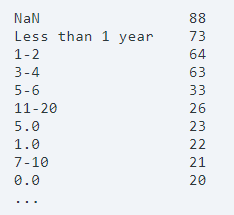

Since we have both categorical and numerical values in our column, it is best to assign them all into different categories for our analysis further. A slighly modified definition for "years of experience" would be categorised as follows -
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [42]:
yrsofservice = combined_updated['institute_service'].copy()
yrsofservice = yrsofservice.astype(str)

In [43]:
yrsofservice.value_counts().sort_index()

0.0                   20
1-2                   64
1.0                   22
10.0                   6
11-20                 26
11.0                   4
12.0                   6
13.0                   8
14.0                   6
15.0                   7
16.0                   5
17.0                   6
18.0                   5
19.0                   3
2.0                   14
20.0                   7
21.0                   3
22.0                   6
23.0                   4
24.0                   4
25.0                   2
26.0                   2
27.0                   1
28.0                   2
29.0                   1
3-4                   63
3.0                   20
30.0                   2
31.0                   1
32.0                   3
33.0                   1
34.0                   1
35.0                   1
36.0                   2
38.0                   1
39.0                   3
4.0                   16
41.0                   1
42.0                   1
49.0                   1


In [44]:
temp = yrsofservice.copy()

In [45]:
def category_of_service(element):
    if element == 'nan': 
        return np.nan
    elif 'Less than 1 year' in element:
        return 'New'
    elif 'More than 20 years' in element:
        return 'Veteran'
    elif int(element) < 3:
        return 'New'
    elif (int(element) >= 3) & (int(element) <= 6):
        return 'Experienced'
    elif (int(element) >= 7) & (int(element) <= 10):
        return 'Established'
    else:
        return 'Veteran'

temp = temp.str.split('.').str[0].str.split('-').str[0]
service_cat = temp.apply(category_of_service)

In [46]:
service_cat

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
5          Veteran
6      Experienced
7              NaN
8          Veteran
9          Veteran
10         Veteran
11         Veteran
12         Veteran
13     Established
14     Established
15     Experienced
16             New
17             NaN
18         Veteran
19         Veteran
20             New
21         Veteran
22     Experienced
23     Experienced
24         Veteran
25     Experienced
26     Established
27             New
28     Experienced
29             New
          ...     
621            New
622    Experienced
623    Experienced
624            NaN
625            NaN
626    Experienced
627            NaN
628            New
629            New
630            New
631            New
632    Experienced
633            New
634            New
635            New
636            New
637    Experienced
638            New
639    Experienced
640    Experienced
641            New
642         

In [47]:
service_cat.value_counts(dropna=False).sort_index()

Established     62
Experienced    172
New            193
Veteran        136
NaN             88
Name: institute_service, dtype: int64

### Step 11 Categorising the Service Category -  creating a new `service_cat` column
On basis of the years of experience, a new column called `service_cat` is created next, in the `combined_updated` dataset.<br> After that, we have a look at how many `NaN` values are in the `dissatisfied` column. 

Since there are only 8 such values, we assign them a Boolean - `False` (since there are 403 `False` values as compared to 240 `True` values, and moreover, excluding or including these rows won't have a sigificant impact on the overall analysis due to their sheer low count (10))

In [48]:
combined_updated['service_cat'] = service_cat.copy()
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE,Established
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE,Veteran
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE,Experienced
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE,Veteran
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE,Experienced
5,1.300000e+01,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14,False,DETE,Veteran
6,1.500000e+01,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,31-35,5,True,DETE,Experienced
7,1.700000e+01,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE,NaN
8,2.100000e+01,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,56-60,30,False,DETE,Veteran
9,2.200000e+01,Resignation-Other reasons,2012.0,Cleaner,Permanent Part-time,Female,51-55,32,False,DETE,Veteran


In [49]:
combined_updated[(combined_updated['dissatisfied']!=False)&(combined_updated['dissatisfied']!=True)]

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
322,6.341770e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,NaN
324,6.341779e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,NaN
345,6.342141e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,NaN
466,6.345510e+17,Resignation,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,NaN
472,6.345581e+17,Resignation,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,NaN
523,6.346963e+17,Resignation,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,NaN
543,6.347827e+17,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,NaN
627,6.350124e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,TAFE,NaN


In [50]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [51]:
# To check if there aren't any NaN values left in 'dissatisfied' column
combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

### Step 12 - CONCLUSION & Performing Initial Analysis
After all this cleaning, finally I am ready to perform my analysis, and (hopefully) I can arrive at some meaningful insights.

#### 12.1  Dissatisfied Resignations (Service Category wise)
Using a straightforward bar-graph to compare the percentage of resignations that were due to some sort of dissatisfaction of the exiting employee, the following significant findings are observed -
1. Contrary to the institutes' beliefs, the **% of dissatisfied employees rises as the the years of service of an employee increase!**
2. `New employees` (0-3 years of experience) are **least likely to resign from the company due to dissatisfaction.**
3. **Almost half** of the `Established` (7-10 yrs) and `Veteran` (> 11 yrs) employees **resign due to dissatisfaction.**

In [52]:
combined_updated.pivot_table(values='dissatisfied', index = 'service_cat')

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


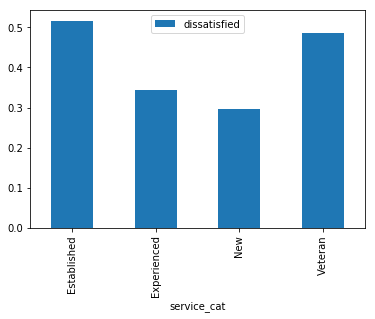

In [53]:
combined_updated.pivot_table(values='dissatisfied', index = 'service_cat').plot.bar()

#### 12.2  Dissatisfied Resignations (Institute Wise) 
Although my imaginary stakeholders told me to carry out a combiined analysis for both the institutes, it is wise to know, which institute contributes more to the dissatisfied employee resignations in our data. 

Here, again, I use a straighforward bar chart to compare the % resignations due to dissatisfaction. The findings are significant -
1. Nearly **50% resignations in DETE** are from dissatisfied employees.
2. Only about **25% resignations in TAFE** are from dissatisfied employees.
3. **Employees in DETE are much more dissatisfied TAFE** (which implicitly tells you a lot about the institute)

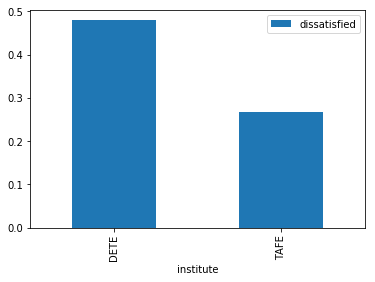

In [54]:
combined_updated.pivot_table(values='dissatisfied', index = 'institute').plot.bar()

#### 12.3 % Dissatisfied Resignations (Employment Status Wise) 
Here again, I use a straighforward bar chart to compare the % resignations due to dissatisfaction. The findings are significant -

1. More than 40% Permanent Full-Time and Permanent Part-Time employees' resign due to dissatisfaction.
2. Only 20% of  other employees' (Temporary, Casual, Contractual) resign due to dissatisfaction.

Bottom Line - **Permanent Employees are most dissatisfied with their jobs.** This is something that the institutes should look into. 

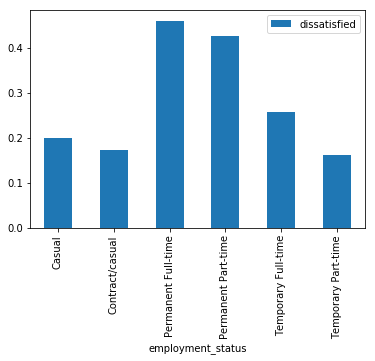

In [55]:
combined_updated['employment_status'].value_counts(dropna = False)
combined_updated.pivot_table(values='dissatisfied', index = 'employment_status').plot.bar()

#### 12.4  Dissatisfied Resignations (Gender Wise) 
Again, I use a straighforward bar chart to compare the % resignations due to dissatisfaction. The findings this time are NOT significant -
* Both the genders are almost equally likely to resign due to dissatisfaction.

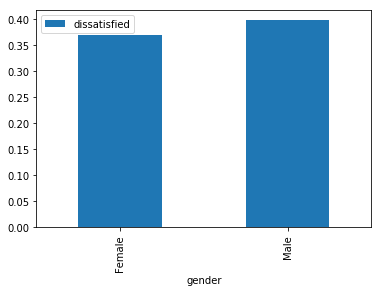

In [56]:
combined_updated['gender'].value_counts(dropna = False)
combined_updated.pivot_table(values='dissatisfied', index = 'gender').plot.bar()

#### 12.5  Dissatisfied Resignations (Job Position Wise) 
Again, I use a straighforward bar chart to compare the % resignations due to dissatisfaction.

Here, I divide the Job Positions into 3 main categories - 
* Job Category 1 - `Administration Position` (287 rows)
* Job Category 2 - `Teaching Position` (156 rows)
* Job Categoty 3 - `Others` (155 rows)

The findings are significant -

1. Only about 20% resignations in `Administration` job roles are due to dissatisfaction.
2. More than 40% resignations in `Teaching` job roles are due to dissatisfaction.

In [57]:
combined_updated['position'].value_counts(dropna = False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
NaN                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Workplace Training Officer                                   6
Technical Officer (TO)                                       5
School Based Professional Staff (Therapist, nurse, etc)

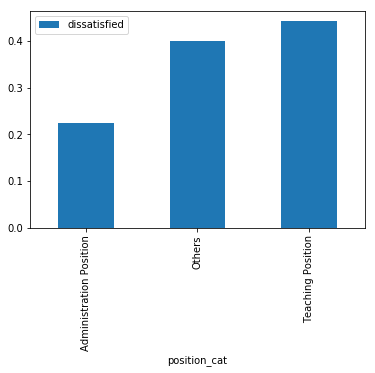

In [58]:
def position_cat_func(element):
    if pd.isnull(element):
        return np.nan
    elif 'Admin' in element:
        return 'Administration Position'
    elif 'Teach' in element:
        return 'Teaching Position'
    else:
        return 'Others'

temp_df = combined_updated.copy()
temp_df['position_cat'] = temp_df['position'].apply(position_cat_func)

# Plotting on Bar Chart
temp_df.pivot_table(values='dissatisfied', index = 'position_cat').plot.bar()

#### 12.6  Dissatisfied Resignations (Employee Age Wise) 
Again, I use a straighforward bar chart to compare the % resignations due to dissatisfaction per age group.

Here, I divide the age the following categories -
* < 20
* 21-30
* 31-40
* 41-50
* 51-55
* 56 +

The findings are significant - 
* Employees **less than 20 years of age are less likely to resign from dissatisfaction** (although take this figure with a grain of salt, as there are only 10 employees aged 20 years or less in the data set)
* **Employees in the 50+ years and 21-30 years bracket are most dissatisfied with their jobs**, as that is the reason for more than 40% of the resignations in those age groups.

In [59]:
def age_cat_classifier(element):
    if pd.isnull(element):
        return np.nan
    elif '20 or younger' in element:
        return '< 20'
    elif ('56 or' in element) | ('56-60' in element) | ('61 or' in element):
        return '> 56'
    elif '5' in element:
        return '51-55'
    else:
        return element[0] + '1 to ' + str(int(element[0])+1) + '0'

# Add a new column to temp_df to capture age-category ('age_cat')
temp_df['age_cat'] = temp_df['age'].apply(age_cat_classifier)

In [60]:
temp_df['age_cat'].value_counts()

51-55       368
> 56         78
31 to 40     73
21 to 30     67
< 20         10
Name: age_cat, dtype: int64

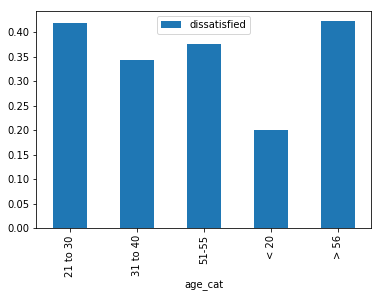

In [61]:
temp_df.pivot_table(values='dissatisfied', index = 'age_cat').plot.bar()

## Conclusion
1. **More experience == More Dissatisfaction** (12.1) - Almost Half of the established and veteran employees resigned due to dissatisfaction (compared to a 30% dissatisfaction rate for employees with <7 years of work-ex)
2. **DETE Employees are more dissatisfied than TAFE** (12.2) - Dissatisfaction rate in resignations is almost 50% for DETE, compared to 25% in TAFE.
3. **Permanent Employees are more dissatisfied than Temporary/Casual/Contractual workers** (12.3)
4. **Teachers are more dissatisfied than Administrators** (12.5) - Dissatisfaction rate in resignations is almost 45% in Teaching job roles, compared to just 25% in Administration job roles.
5. **21-30 and 50+ Age Groups are more dissatisfied than other age-groups** (12.6)

*Thanks!*